In [21]:
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [17]:
x = np.load("data/missed_202310250NYK.html.npz")["arr_0"]
y = np.load("data/missed_202310250NYK.html.npz")["arr_1"]

In [99]:
path = "data"
x = np.array([])
y = np.array([])
with os.scandir(path) as it:
    for entry in it:
        if entry.name.endswith(".npz") and entry.is_file():
            if entry.name.startswith("missed"):
                x = np.append(x, np.load(f"data/{entry.name}")["arr_0"])
                y = np.append(y, np.load(f"data/{entry.name}")["arr_1"])
x.shape

(4029,)

In [100]:
data = np.vstack([x, y]).T

kde = KernelDensity(bandwidth=30, kernel='epanechnikov')
kde.fit(data)

xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)

In [101]:
xmin, xmax = 0, 500
ymin, ymax = 0, 472

x_grid = np.linspace(xmin, xmax, 100)
y_grid = np.linspace(ymin, ymax, 100)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()]).T

Z = np.exp(kde.score_samples(positions)).reshape(X.shape)

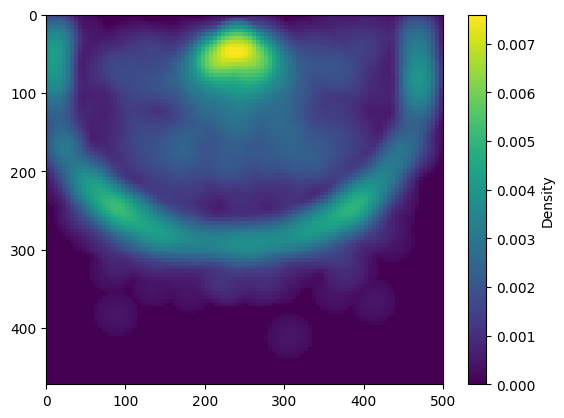

In [102]:
plt.imshow(np.sqrt(Z), origin='lower', extent=[xmin, xmax, ymin, ymax], cmap='viridis', aspect='auto')
plt.colorbar(label='Density')
#plt.scatter(x, y, marker='.')
plt.gca().invert_yaxis()